In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv(r"E:\Download\2019机器学习sklearn课堂\titanic.csv")

In [104]:
#用来查看data中的信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [106]:
#筛选特诊,Cabin缺失值过多删除
data.drop(['Name', 'Cabin', 'Ticket'], inplace=True, axis=1)#用去掉后data取代之前


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [108]:
#处理缺失值,在这里使用均值填补缺失值
data['Age'] = data['Age'].fillna(data.Age.mean())

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [110]:
#embarked只有两行缺失，可以删掉
data = data.dropna()

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [112]:
#决策树处理不了文字，将其转换成数字,查看有多少分类
labels = data.Embarked.unique().tolist()
data.Embarked = data.Embarked.apply(lambda x:labels.index(x))

In [113]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


若分类特征变量之间有顺序，该如何换算？

In [114]:
#性别可以直接转换成True/False,而后转化成1/0
data['Sex'] = (data['Sex'] == "male").astype("int")

In [115]:
#使用loc进行定位
data.loc[:,"Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [116]:
#特征和标签分离
x = data.loc[:, data.columns != 'Survived']
y = data.loc[:, data.columns == 'Survived']

In [117]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3)

In [118]:
#保持索引的有序性,直接赋予新的索引
for i in [xtrain, xtest, ytrain, ytest]:
    i.index = range(i.shape[0])

In [119]:
xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,464,2,1,48.000000,0,0,13.0000,0
1,428,2,0,19.000000,0,0,26.0000,0
2,866,2,0,42.000000,0,0,13.0000,0
3,593,3,1,47.000000,0,0,7.2500,0
4,65,1,1,29.699118,0,0,27.7208,1
...,...,...,...,...,...,...,...,...
617,659,2,1,23.000000,0,0,13.0000,0
618,123,2,1,32.500000,1,0,30.0708,1
619,216,1,0,31.000000,1,0,113.2750,1
620,253,1,1,62.000000,0,0,26.5500,0


In [128]:
clf = DecisionTreeClassifier(random_state=1
                            ,max_depth=3)
clf.fit(xtrain, ytrain)
score1 = clf.score(xtrain, ytrain)
score2 = clf.score(xtest, ytest)

In [131]:
#交叉验证
score3 = cross_val_score(clf, x, y, cv=10).mean()

In [132]:
score3

0.8143896833503576

0.8166624106230849


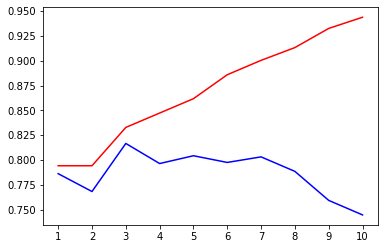

In [134]:
#画出学习曲线
tr = []
te = []
for i in range(10):
    clf1 = DecisionTreeClassifier(random_state=10
                                 , max_depth=i+1
                                 , criterion="entropy")
    clf1 = clf1.fit(xtrain, ytrain)
    score_tr = clf1.score(xtrain, ytrain)
    score_te = cross_val_score(clf1, x, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1, 11), tr, color="red", label="train")
plt.plot(range(1, 11), te, color="blue", label="test")
plt.xticks(range(1, 11))
plt.show()

In [137]:
#网格搜索技术可以帮助调整所有参数
#参数以及其可能取值，字典
import numpy as np
gini_threholds = np.linspace(0, .5, 20)#生成50个随机递增数
parameters = {"criterion":("gini", "entropy")
    ,"splitter":("best", "random")
    ,"max_depth":[*range(1, 10)]
    ,"min_samples_leaf":[*range(1, 50, 5)]
    ,"min_impurity_decrease":[*gini_threholds]
     }
clf = DecisionTreeClassifier(random_state=25)
gs = GridSearchCV(clf, parameters, cv=10)
gs.fit(xtrain, ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=25,
                                              splitter='best'),
             iid='dep...
                                                   0.23684210526315788,
                          

In [139]:
gs.best_params_#参数的最佳组合

{'criterion': 'gini',
 'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [140]:
gs.best_score_#最佳组合的精确性

0.8391961085509472

# 尝试使用随机森林填补

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
x_missing = data.loc[:, data.columns != 'Survived']
y = data.loc[:, data.columns == 'Survived']

In [8]:
x_missing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
